# Module 1 - Univariate Investment Risk and Returns

## Financial timeseries data
In this exercise, a timeseries of **Microsoft** stock as .csv has been provided. Here, `pandas` will be used to read in the csv as a dataframe.

- Import `pandas` as **pd**
- Use `pd.read_csv()` to read in file "MSFTPrices.csv" and make sure the 'Date' column is parsed correctly using the `parse_dates` argument and call this result `StockPrices`
- Ensure the dataframe is sorted by the 'Date' column.
- Print the first 5 rows of `StockPrices`

In [ ]:
# Import pandas as pd
import pandas as pd
# Read in the csv file and parse dates
StockPrices = pd.read_csv('MSFTPrices.csv', parse_dates=['Date'])
# Ensure the prices are sorted by Date
StockPrices = StockPrices.sort_values(by='Date')
# Print only the first five rows of StockPrices
print(StockPrices.head())
print(StockPrices.tail())

        Date    Open    High     Low     Close    Volume   Adjusted
0 2000-01-03  88.777  89.722  84.712  58.28125  53228400  38.527809
1 2000-01-04  85.893  88.588  84.901  56.31250  54119000  37.226345
2 2000-01-05  84.050  88.021  82.726  56.90625  64059600  37.618851
3 2000-01-06  84.853  86.130  81.970  55.00000  54976600  36.358688
4 2000-01-07  82.159  84.901  81.166  55.71875  62013600  36.833828
           Date    Open    High     Low      Close    Volume   Adjusted
4556 2018-02-12  89.157  90.202  88.343  89.129997  35720300  88.713272
4557 2018-02-13  89.348  90.423  88.212  89.830002  26407700  89.410004
4558 2018-02-14  88.510  90.990  88.410  90.809998  34960900  90.809998
4559 2018-02-15  91.210  92.720  90.620  92.660004  27823900  92.660004
4560 2018-02-16  92.450  93.500  91.800  92.000000  30557400  92.000000


## Calculating financial returns

The file in the previous exercise is **OHLCV** data. **OHLCV** - _Open, High, Low, Close, Adjusted Close, Volume_

The 'Adjusted' column is the most important. It is normalized for stock splits, dividends, and other corporate actions, and is a true reflection for the return of the stock over time. It is the 'Adjusted' closing price that is to be employed for calculating returns.

This exercise continues to use `StockPrices`.

- Calculate the simple return of the stock on the 'Adjusted' column and save it to the 'Returns' column.
- Print the first 5 rows of `StockPrices`
- Use `pandas` `plot()` method to plot the 'Returns' column over time

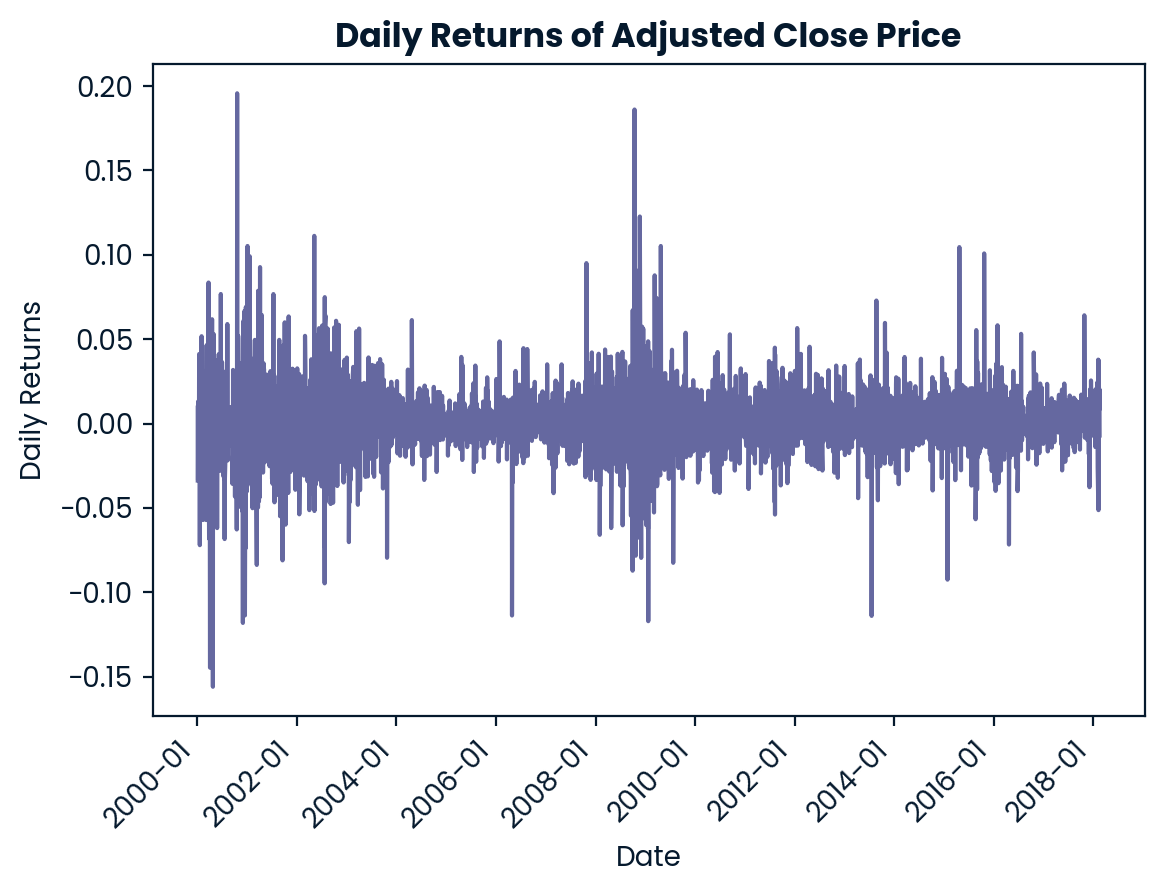

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Convert the 'Date' column to datetime if it's not already, and set the 'Date' column as the index
StockPrices['Date'] = pd.to_datetime(StockPrices['Date'])
StockPrices.set_index('Date', inplace=True)
# Calculate the daily returns of the adjusted close price
StockPrices['Returns'] = StockPrices['Adjusted'].pct_change()
# Plot the returns column over time
fig, ax = plt.subplots()
StockPrices['Returns'].plot(ax=ax)
# Set axis labels and title
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.title('Daily Returns of Adjusted Close Price', fontweight='bold')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.show()

## Return distributions

This exercise continues to use `StockPrices`.

Note:
- Outliers on the left tail of the return distribution are what we often want to avoid as they represent large negative daily returns.
- Outliers on the RHS of the distribution are normally good events for the stock such as a positive earnings suprise.

- Covert the 'Returns' column from decimal to percentage returns and assign it to `percent_return`
- Drop the missing values (represented as `NaN`) from `percent_return` and save it to `returns_plot`
- Plot a histogram of `returns_plot` with 75 bins using matplotlib's `hist()` function

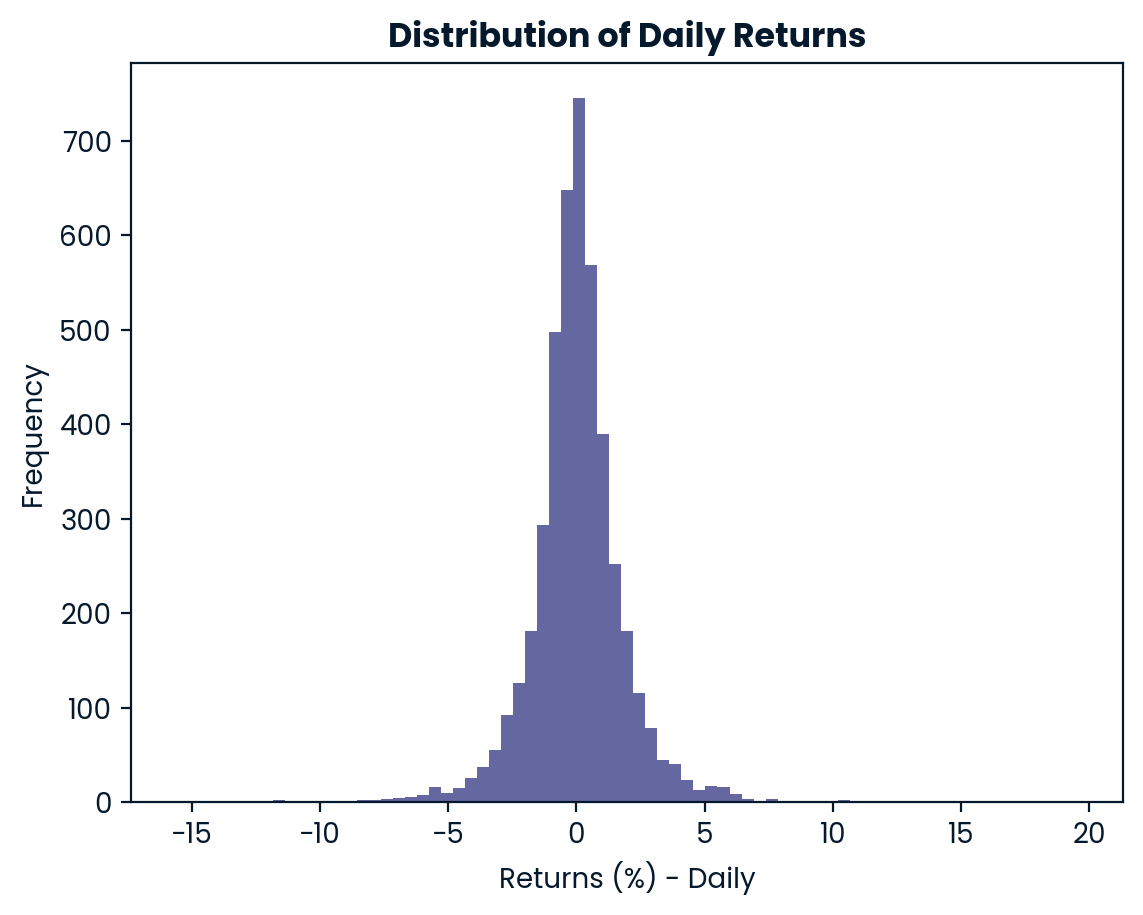

In [ ]:
# Convert the decimal returns into percentage returns
percent_return = StockPrices['Returns']*100

# Drop the missing values
returns_plot = percent_return.dropna()

# Plot the returns histogram
plt.hist(returns_plot, bins=75)
plt.xlabel('Returns (%) - Daily')
plt.ylabel('Frequency')
plt.title('Distribution of Daily Returns', fontweight='bold')
plt.show()

## First Moment: **$\mu$**

Calculating the average daily return of a stock is essentially estimating the first moment of the historical returns distribution.

Daily return estimates don't hold much inference for investors in the longrun. The `Average Annualized Return` is more indicative of a stocks daily average return for the number of trading days in the year - typically _252 days_.

The formula is expressed belows: $$\text{Average Annualized Return} = (1+\mu)^{252} - 1$$

`StockPrices` is still used here.

- Import `numpy` as **np**
- Calculate the mean of the 'Returns' column to estimate the first moment ($\mu$) and set it equal to `mean_return_daily`
- Use the formula to derive the average annualized return assuming 252 trading days per year.

In [ ]:
# Import numpy as np
import numpy as np
# Calculate the average daily return of the stock
mean_return_daily = np.mean(StockPrices['Returns'])
#print(f"{(StockPrices['Returns'].mean() * 100):.2f}%")
# Calculate the implied annualized average return
mean_return_annualized = ((1+mean_return_daily)**252)-1
#print(f"{(mean_return_annualized * 100):.2f}%")
print(f"The mean daily return is {(StockPrices['Returns'].mean() * 100):.2f}% and the implied annualized average return is {(mean_return_annualized * 100):.2f}%.")

The mean daily return is 0.04% and the implied annualized average return is 9.99%.


## Second Moment: **$\sigma$**

- Calculate the daily standard deviation of the 'Returns' column and set it equal to `sigma_daily`
- Derive the daily variance ($(\sigma)^{2}$) by squaring the standard deviation

In [ ]:
# Calculate the standard deviation of daily return of the stock
sigma_daily = np.std(StockPrices['Returns'])
#print(sigma_daily)
# Calculate the daily variance
variance_daily = sigma_daily*sigma_daily
#print(variance_daily)
# Print both in a single statement, converted to percentages
print(f"The standard deviation of daily returns is {sigma_daily * 100:.2f}% and the daily variance is {variance_daily * 10000:.2f}%.")

The standard deviation of daily returns is 1.93% and the daily variance is 3.74%.


## Annualizing Variance

Variance cannot be annualized in the same way that the mean is.

Here: $$\text{Annualized volatility} = \sigma * \sqrt{252}$$ and $$\text{Annualized variance} = (\text{Annualized vlatility})^2$$

For this exercise:
- Annualize `sigma_daily` to obtain annualized volatility and call this `sigma_daily`.
- Then obtain 'Annualized variance' and call this `sigma_annualized`

In [ ]:
# Annualize the standard deviation
sigma_daily = np.std(StockPrices['Returns'])
sigma_annualized = sigma_daily*np.sqrt(252)
#print(sigma_annualized)

# Calculate the annualized variance
variance_annualized = sigma_annualized*sigma_annualized
#print(variance_annualized)
# Print both in a single statement, converted to percentages
print(f"The annualized standard deviation is {sigma_annualized * 100:.2f}% and the annualized variance is {variance_annualized * 100:.2f}%.")

The annualized standard deviation is 30.70% and the annualized variance is 9.43%.


## Third Moment: Skewness

To calculate the third moment, the `skew()` function from `scipy.stats` can be used.

As a reminder, a negative skew is a right-leaning curve, while positive skew is a left-leaning curve. In Finance, generally positive skewness is desired. This would mean that the probability of large positive returns is unusally high, and the negative returns are more closely clustered and predictable.

- Import `skew()` from `scipy.stats`
- Drop missing values in the 'Returns' column to prevent errors and call this result `clean_returns`
- Calculate the skewness of `clean_retuns`

In [ ]:
# Import skew from scipy.stats
from scipy.stats import skew
# Drop the missing values
clean_returns = StockPrices['Returns'].dropna()
# Calculate the third moment (skewness) of the returns distribution
returns_skewness = skew(clean_returns)
print(round(returns_skewness, 3))

0.219


- Import `kurtosis` from `scipy.stats`
- Use `clean_returns` to calculate excess Kurtosis.
- Derivce the $4^{th}$ moment from `excess_returns`


`clean_returns` is to be reused in this task.

In [ ]:
# Import kurtosis from scipy.stats
from scipy.stats import kurtosis
# Calculate the excess kurtosis of the returns distribution
excess_kurtosis = kurtosis(clean_returns)
print(round(excess_kurtosis,3))
# Derive the true fourth moment of the returns distribution
fourth_moment = excess_kurtosis + 3
print(round(fourth_moment, 3))

10.315
13.315


## Statistical Tests for normality

To truly be confident in one's judgement of the normality of a stock's distribution, one must use true statistical tests rather than simply examining skewness and kurtosis.

The `shapiro()` function from `scipy.stats` can be used to run a _Shapiro-Wilk test_ of normality on the stock returns. The function will return two values in a list.
1. The first value is the t-stat of the test
2. The second value is the p-value. This is used to make a judgement on the normality of the data.


`clean_returns` is to be reused in this task.

- Import `shapiro()` from `scipy.stats`.
- Run the Shapiro-Wilk test on `clean_returns` and call this result `shapiro_results`
- Extract the **p-value** from the shapiro_results tuple.

In [ ]:
# Import shapiro from scipy.stats
from scipy.stats import shapiro
# Run the Shapiro-Wilk test on the stock returns
shapiro_results = shapiro(clean_returns)
print("Shapiro results:", shapiro_results)
# Extract the p-value from the shapiro_results
p_value = round(shapiro_results[1], 4)
print("P-value: ", p_value)

Shapiro results: ShapiroResult(statistic=0.9003633260726929, pvalue=0.0)
P-value:  0.0








# Module 2 - Portfolio Investing

## Calculating portfolio returns

The model portfolio is constructed with pre-defined weights for some of the largest companies in the world just before January 2017.

**Here the `Big9Returns2017.csv` is used.**

- The numpy array of with values have been provided as `porfolio_weights`
- Use the .mul() method to multiply the `portfolio_weights` across the rows of `StockReturns` to get weighted stock returns - Store this result as `WeightedReturns`
- Then use the `sum()` method across the rows on the `WeightedReturns` object to calculate the portfolio returns
- Create a plot of cumulative returns over time.

In [ ]:
StockReturns = pd.read_csv('Big9Returns2017.csv', parse_dates=['Date'])
#StockPrices.head()
print(StockReturns.columns)

Index(['Date', 'AAPL', 'MSFT', 'XOM', 'JNJ', 'JPM', 'AMZN', 'GE', 'FB', 'T'], dtype='object')


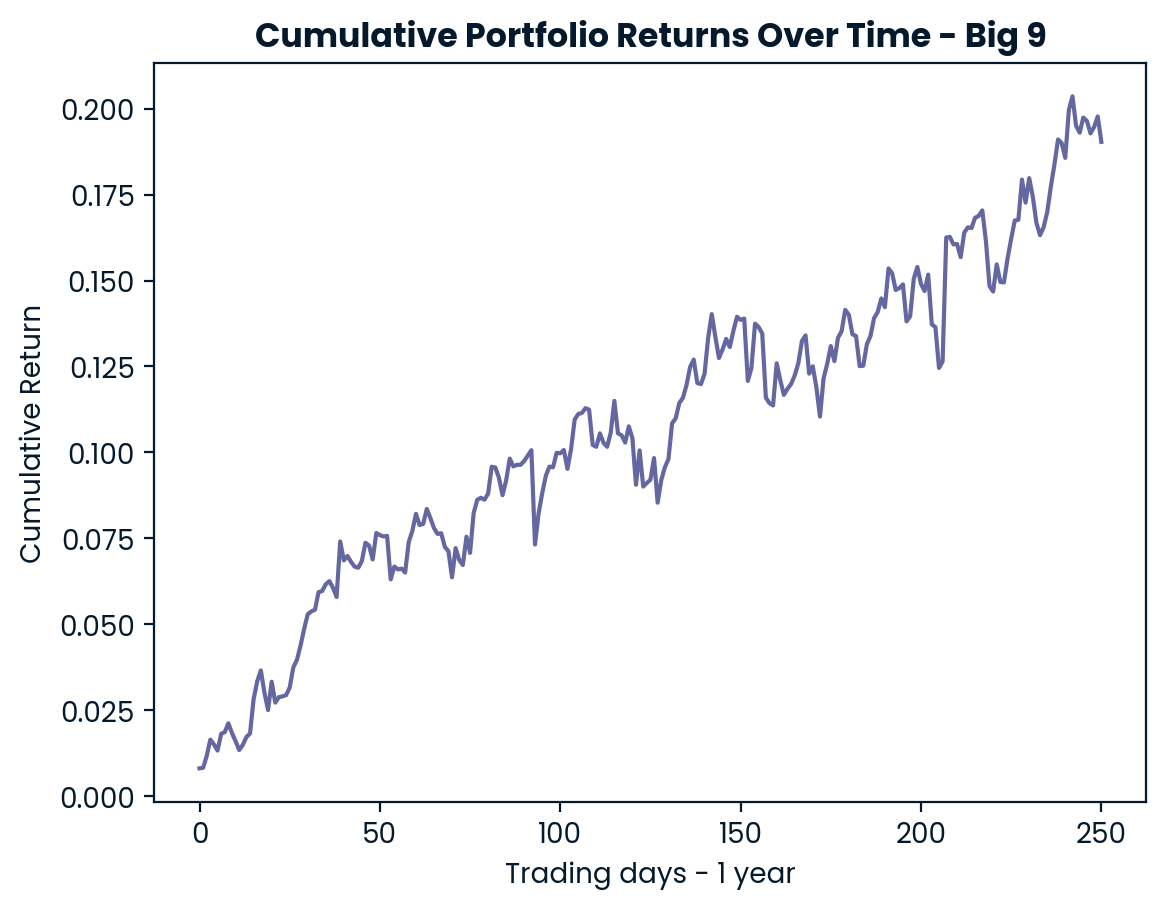

In [ ]:
# Defining the portfolio weights as a numpy array
portfolio_weights = np.array([
    0.12, 0.15, 0.08, 0.05, 0.09, 0.10, 0.11, 0.14, 0.16
])
# Exclude the 'Date' column for the calculation
StockReturns_no_date = StockReturns.drop(columns=['Date'])
# Exclude the 'Portfolio' column if it already exists, to avoid mismatch
StockReturns_no_date = StockReturns_no_date.loc[:, StockReturns_no_date.columns != 'Portfolio']
# Calculate the weighted stock returns
WeightedReturns = StockReturns_no_date.mul(portfolio_weights, axis=1)
# Calculate the portfolio returns
StockReturns_no_date['Portfolio'] = WeightedReturns.sum(axis=1)
# Plot the cumulative portfolio returns over time
CumulativeReturns = ((1 + StockReturns_no_date["Portfolio"]).cumprod() - 1)

# Plotting
CumulativeReturns.plot()
plt.title("Cumulative Portfolio Returns Over Time - Big 9", fontweight='bold')
plt.xlabel("Trading days - 1 year")
plt.ylabel("Cumulative Return")
plt.show()

## Equity weighted portfolio

When comparing different porfolios, we often need to consider performance versus a naive equally-weighted portfolio.
- If the portfolio doesn't outperform a simple equally-weighted portfolio, you might want to consider a different strategy, or simply opt for the naive approach if all else fails.
- You can expect equally-weighted portfolios to tend to outperform the market when the largest companies are performing poorly.
- This is because even tiny companies would have the same weight in the equally-weighted portfolio as Apple or Amazon for example.

- Set `numstocks` equal to 9 for the stocks in portfolio
- Use `np.repeat()` to set `portfolio_weights_ew` equal to an array with equal weights for each of the 9 stocks
- Use the `.iloc` accessor to select all rows and the first 9 columns when calculating the portfolio return
- Review the plot of cumulative returns over time

In [ ]:
# Function to plot cumulative returns
def cumulative_returns_plot(columns):
    """
    Plots the cumulative returns of the specified portfolio columns.
    Parameters:
    columns: list of column names (strings) from the StockReturns DataFrame
    """
    # Ensure no 'Date' column is involved in calculations
    returns = StockReturns[columns]
    # Calculate cumulative returns for each column
    cumulative_returns = (1 + returns).cumprod() - 1
    # Plotting
    cumulative_returns.plot()
    plt.title("Cumulative Returns of Portfolio(s)", fontweight='bold')
    plt.xlabel("Trading days")
    plt.ylabel("Cumulative Return")
    plt.legend(columns)
    plt.show()

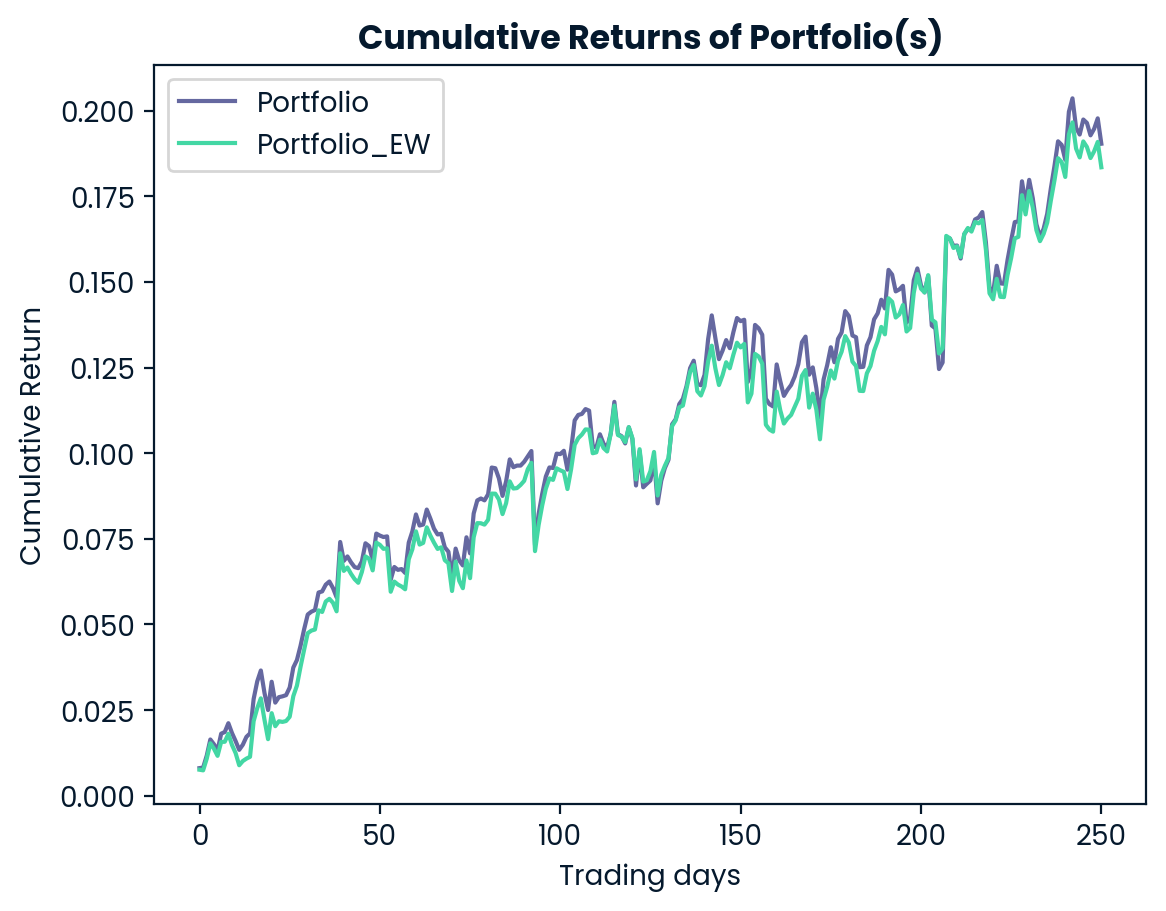

In [ ]:
import matplotlib.pyplot as plt

# Defining the portfolio weights
portfolio_weights = np.array([0.12, 0.15, 0.08, 0.05, 0.09, 0.10, 0.11, 0.14, 0.16])
# Exclude the 'Date' column and apply weights to stock columns
StockReturns_no_date = StockReturns.drop(columns=['Date']).iloc[:, :9]
# Calculate the weighted portfolio returns
WeightedReturns = StockReturns_no_date.mul(portfolio_weights, axis=1)
StockReturns['Portfolio'] = WeightedReturns.sum(axis=1)
# Calculate the equally-weighted portfolio returns
numstocks = 9
portfolio_weights_ew = np.repeat(1/numstocks, numstocks)
StockReturns['Portfolio_EW'] = StockReturns_no_date.iloc[:, :numstocks].mul(portfolio_weights_ew, axis=1).sum(axis=1)
# Plot cumulative returns for both portfolios
cumulative_returns_plot(['Portfolio', 'Portfolio_EW'])

## Market-cap weighted portfolio

When large companies are performing well, market capitalization or **market cap** weighted portfolios tend to outperform.
This is because the largest weights are being assigned to the largest companies, or the companies with the largest market cap.

Figures for **market cap** of companies in this exercise have been taken just before January 2017. Hence, for a 252 trading day year, this would be 2016.

- Define the `market_capitalizations` array in billions
- Calculate `mcap_weights` array such that each element is the ratio of market cap of the company to the total market cap of all companies
- Use the `.mul()` method on `mcap_weights` and returns to calculate the market capitalization weighted portfolio returns
- Review a cumulative plot of returns over time

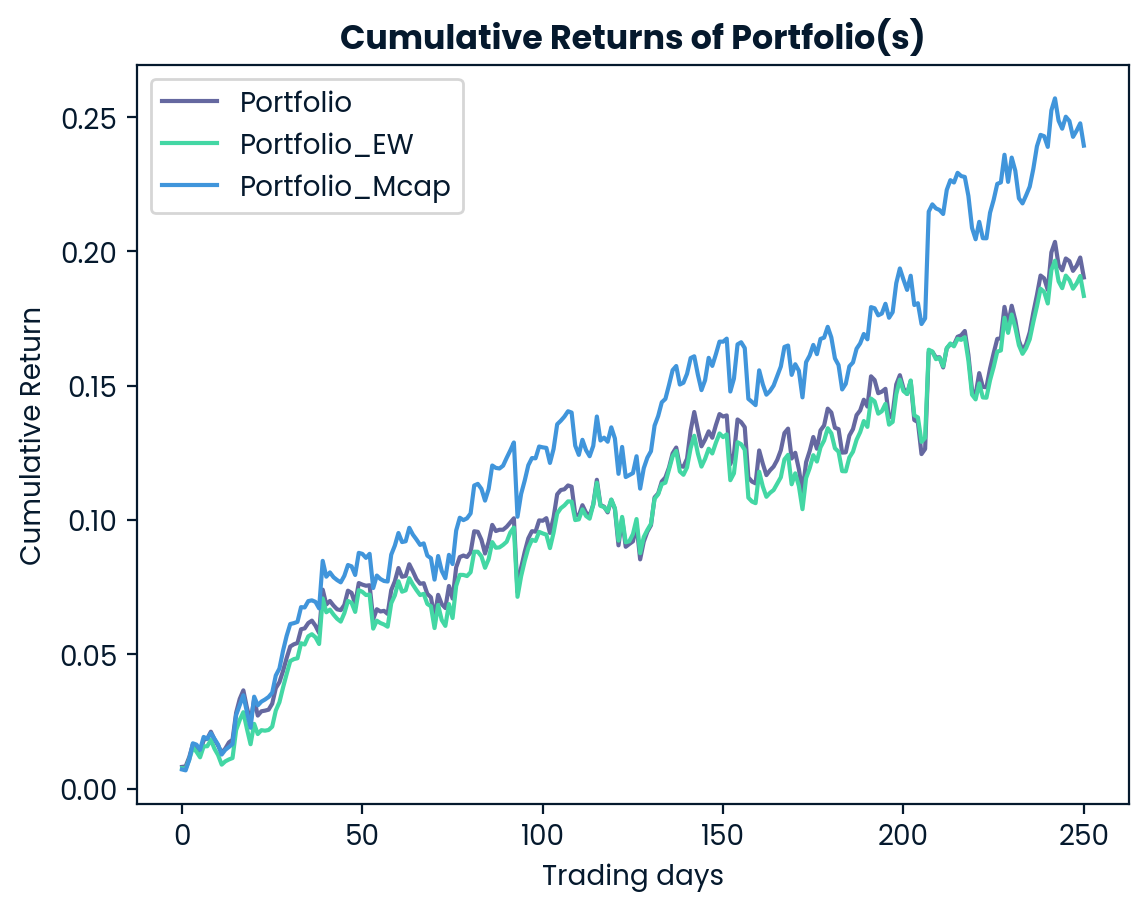

In [ ]:
# Defining the array of market capitalization (billions)
market_capitalizations = np.array([
    601.51, 469.25, 349.5, 310.48, 299.77, 356.94, 268.88, 331.57, 246.09
])
# Exclude the 'Date' column and apply weights to stock columns
StockReturns_no_date = StockReturns.drop(columns=['Date']).iloc[:, :9]
# Calculate the market cap weights
mcap_weights = market_capitalizations / market_capitalizations.sum()
# Calculate the market cap weighted portfolio returns
StockReturns['Portfolio_Mcap'] = StockReturns_no_date.mul(mcap_weights, axis=1).sum(axis=1)
cumulative_returns_plot(['Portfolio', 'Portfolio_EW', 'Portfolio_Mcap'])

## The correlation matrix

The correlation matrix can be used to estimate the linear historical relationship between the returns of multiple assets. The `corr()` method on a `pandas` dataframe can be used to calculate the correlation matrix.
As a reminder, correlation is a bidirectional measurement.

- Calculate the `correlation_matrix` of the `StockReturns` dataframe.
- Use seaborn's `heatmap()` on `correlation_matrix`

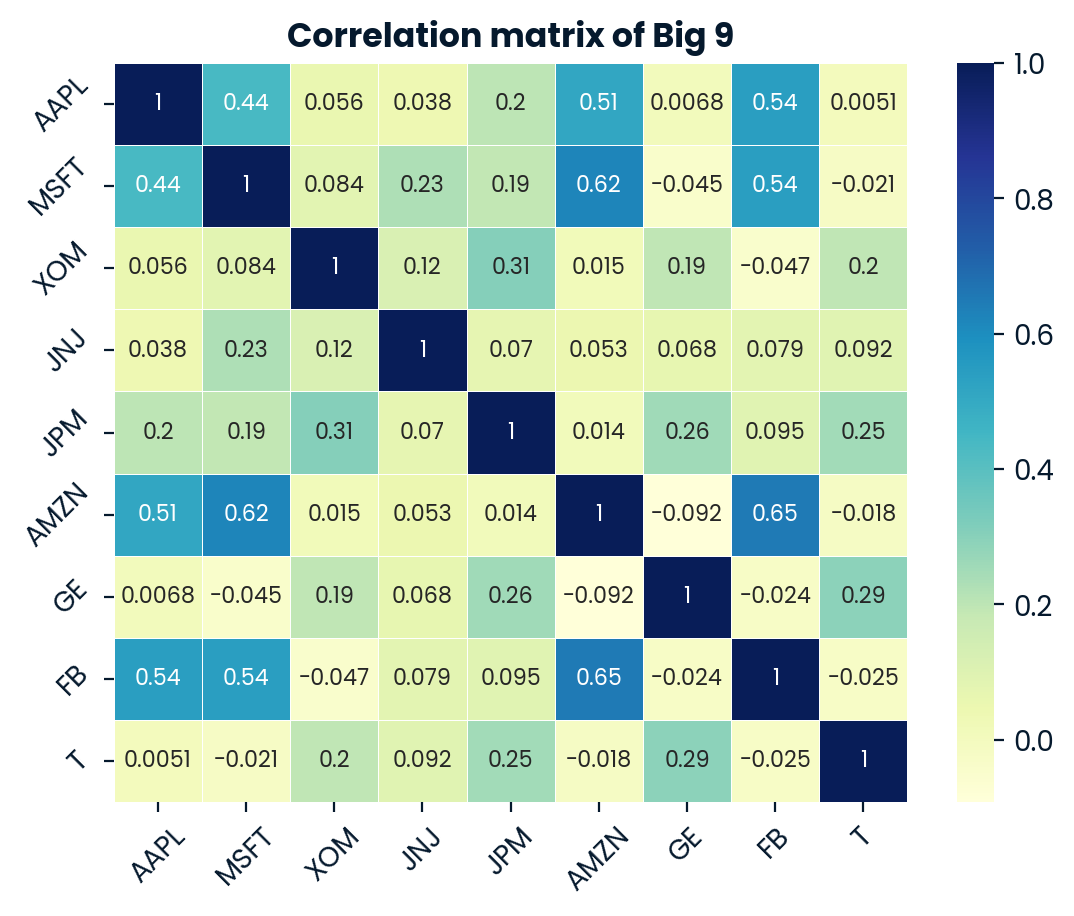

In [ ]:
# Calculate the correlation matrix
correlation_matrix = StockReturns.drop(columns=['Date']).iloc[:, :9].corr()
# Import seasborn as sns
import seaborn as sns
# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', linewidths=0.3, annot_kws={"size":8})
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title("Correlation matrix of Big 9", fontweight='bold')
plt.show()

## The co-variance matrix

Also known as variance-covariance matrix. The covariance matix can easily be compute using the `.cov()` method.

The correlation matrix in the previous exercise doesn't really infer anything about the variance of the underlying assets, only the linear relationships between assets. The covariance matrix, on the other hand, contains all this information, and is very useful for portfolio optimization and risk management purposes.

- Calculate the covariance matrix of the `StockReturns` dataframe.
- Annualize the covariance matrix by multiplying by 252, the approximate number of trading days in a year.

In [ ]:
# Calculate the covariance matrix
cov_mat = StockReturns.drop(columns=['Date']).iloc[:, :9].cov()
# Annualize the covariance matrix
cov_mat_annual = cov_mat * 252
cov_mat_annual

,AAPL,MSFT,XOM,JNJ,JPM,AMZN,GE,FB,T
AAPL,0.030996,0.011400,0.001093,0.000774,0.005716,0.018805,0.000236,0.016243,0.000152
MSFT,0.011400,0.021912,0.001392,0.003899,0.004597,0.019275,-0.001315,0.013682,-0.000530
XOM,0.001093,0.001392,0.012500,0.001548,0.005554,0.000354,0.004295,-0.000890,0.003751
JNJ,0.000774,0.003899,0.001548,0.013092,0.001307,0.001266,0.001540,0.001545,0.001780
JPM,0.005716,0.004597,0.005554,0.001307,0.026371,0.000474,0.008283,0.002631,0.006972
AMZN,0.018805,0.019275,0.000354,0.001266,0.000474,0.043954,-0.003830,0.023290,-0.000638
GE,0.000236,-0.001315,0.004295,0.001540,0.008283,-0.003830,0.039270,-0.000821,0.009849
FB,0.016243,0.013682,-0.000890,0.001545,0.002631,0.023290,-0.000821,0.028937,-0.000708
T,0.000152,-0.000530,0.003751,0.001780,0.006972,-0.000638,0.009849,-0.000708,0.028833


## Portfolio Standard Deviation

To calculate portfolio volatility, we need the covariance matric, the portfolio weights, and knowledge of the transpose operation.

**Note:** The transpose of a numpy array can be calculated using the $.T$ attribute. The `np.dot()` function is the dot-product of two arrays.

The formula for portfolio volatility is:

$$ \sigma_{Portfolio} = \sqrt{ w^T \cdot \sum \cdot w}$$

- $\sigma_{Portfolio}$: Portfolio Volatility
- $\sum$: Covariance matrix of returns
- $w$:Portfolio weights ($w^T$ is the transposed portfolio weights)
- $.$: The dot-multiplication operator

For this exercise, `portfolio_weights` and `cov_mat_annual` will be employed from calculations above.

**Calculate the portfolio volatility assuming you use the formula above.**

In [ ]:
# Import numpy as np
import numpy as np
# Calculate the portfolio standard deviation
portfolio_volatility = np.sqrt(np.dot(portfolio_weights.T, np.dot(cov_mat_annual, portfolio_weights)))
print(round(portfolio_volatility,5))

0.08931


## Sharpe Ratios

In [ ]:
RandomPortfolios = pd.read_csv('EfficientFrontierPortfoliosSlim.csv')
#StockPrices.head()
print(RandomPortfolios.columns)

Index(['AAPL weight', 'MSFT weight', 'XOM weight', 'JNJ weight', 'JPM weight',
       'AMZN weight', 'GE weight', 'FB weight', 'T weight', 'Returns',
       'Volatility'],
      dtype='object')


The Sharpe ratio is a simple metric of risk adjusted return and is useful for determining how much risk is being taken to achieve a certain level of return.

The original 1966 ratio calculation is straightforward:
$$ S = \frac{R_a - r_f}{\sigma_a} $$

- S: Sharpe Ratio
- $R_a$: Asset return
- $r_f$: Risk-free rate of return
- $\sigma_a$: Asset volatility


- Assume a `risk_free` rate of 0 for this exercise.
- Calculate the Sharpe ratio for each asset

In [ ]:
# Setting risk free rate
risk_free = 0
# Calculate the Sharpe ratio for each asset
RandomPortfolios['Sharpe'] = (RandomPortfolios['Returns'] - risk_free) / RandomPortfolios['Volatility']
# Print the range of Sharpe ratios
print(RandomPortfolios['Sharpe'].describe()[['min', 'max']])

min    0.742884
max    2.270462
Name: Sharpe, dtype: float64


## The MSR portfolio

The maximum sharpe ratio (MSR) which lies at the apex of the efficient frontier can be constructed by looking for the portfolio with the highest Sharpe ratio.

**Note: the MSR portfolio can often be quite erratic. Even though the portfolio had a high historical Sharpe ratio, it doesn't guarantee that the portfolio will have a good Sharpe ratio moving forward.**

In [ ]:
RandomPortfolios.columns

Index(['AAPL weight', 'MSFT weight', 'XOM weight', 'JNJ weight', 'JPM weight',
       'AMZN weight', 'GE weight', 'FB weight', 'T weight', 'Returns',
       'Volatility', 'Sharpe'],
      dtype='object')

In [ ]:
StockReturns.columns

Index(['Date', 'AAPL', 'MSFT', 'XOM', 'JNJ', 'JPM', 'AMZN', 'GE', 'FB', 'T',
       'Portfolio', 'Portfolio_EW', 'Portfolio_Mcap'],
      dtype='object')

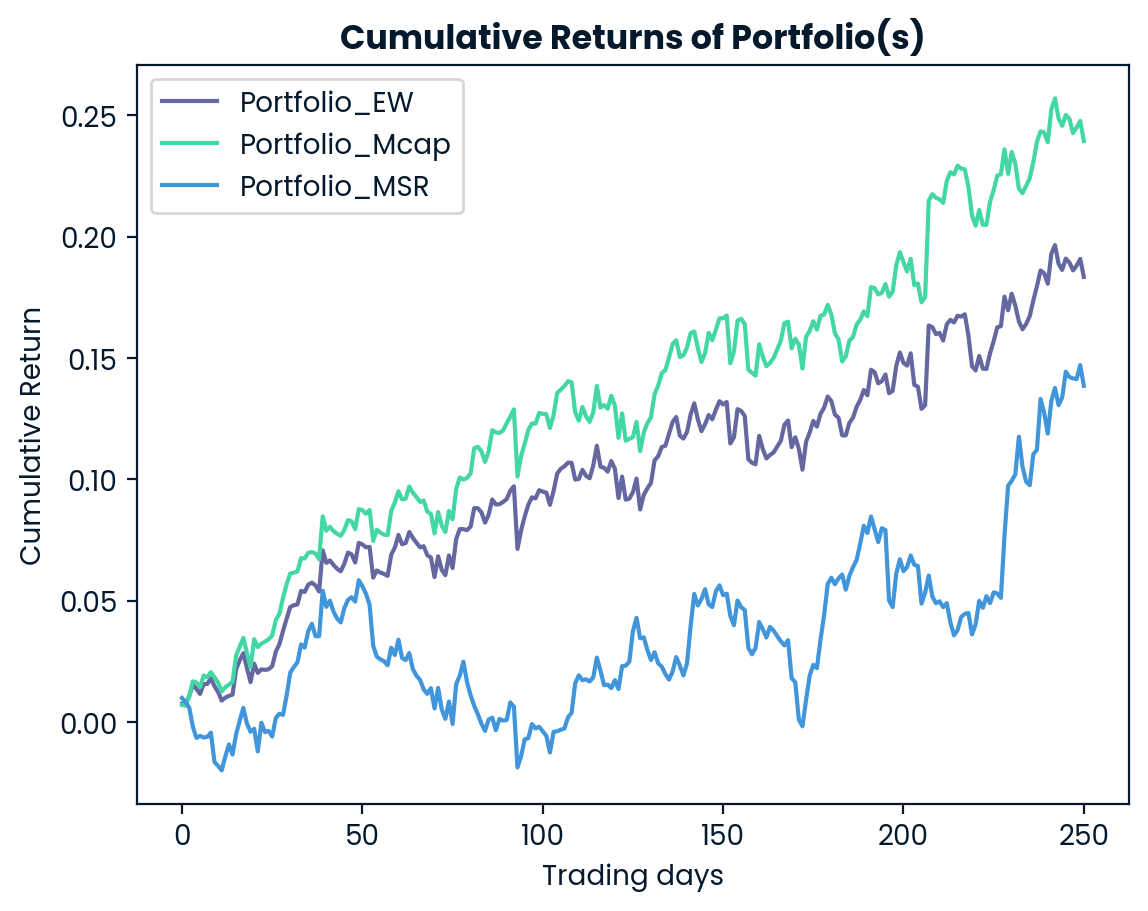

In [ ]:
# Sort the portfolis by Sharpe ratio
sorted_portfolios = RandomPortfolios.sort_values(by=['Sharpe'], ascending=False)
# Extract the corresponding weights
MSR_weights = sorted_portfolios.iloc[0, 0:numstocks]
# Cast the MSR weights as a numpy array
MSR_weights_array = np.array(MSR_weights)
# Calculate the MSR portfolio returns
StockReturns['Portfolio_MSR'] = StockReturns.drop(columns=['Date']).iloc[:, :9].mul(MSR_weights_array, axis=1).sum(axis=1)
# Plot the cumulative returns
cumulative_returns_plot(['Portfolio_EW','Portfolio_Mcap','Portfolio_MSR'])

## The GMV portfolio

The global minimum variance (GMV) portfolio is the portfolio with the lowest standard deviation (risk) and the highest return for the given risk level.

**Returns are hard to predict, but volatilities and correlations tend to be more stable over time. This means that the GMV portfolio often outperforms the MSR portfolios out of sample even though the MSR would outperform quite significantly in-sample. In essence, it is the out of sample results that really matter in finance.**

- Sort `RandomPortfolios` with the lowest volatility value, ranking in ascending order
- Multiply `GMV_weights_array` across the rows of `StockReturns` to get weighted stock returns
- Construct a cumulative returns plot over time

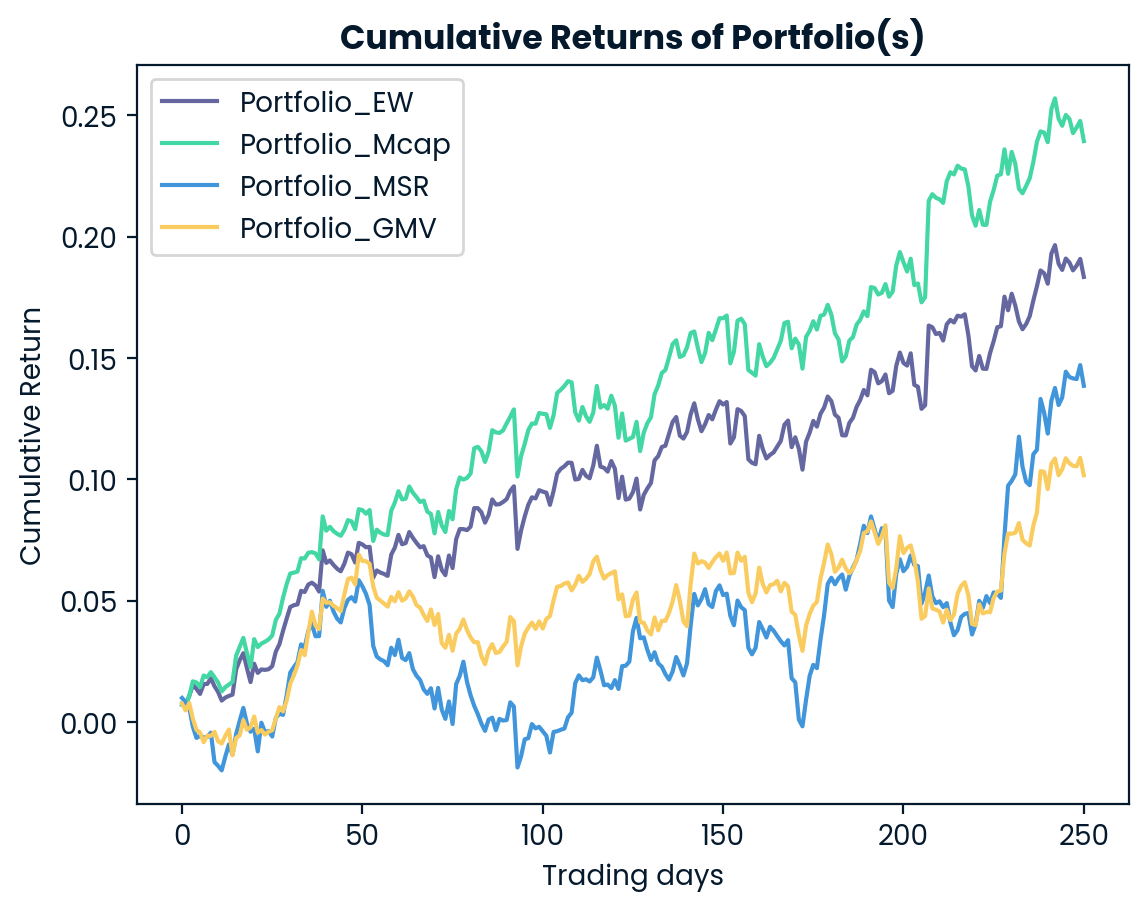

In [ ]:
# Sort the portfolios by volatility
sorted_portfolios = RandomPortfolios.sort_values(by=['Volatility'], ascending=True)
# Extract the corresponding weights
GMV_weights = sorted_portfolios.iloc[0, 0:numstocks]
# Cast the GMV weights as a numpy array
GMV_weights_array = np.array(GMV_weights)
# Calculate the GMV portfolio returns
StockReturns['Portfolio_GMV'] = StockReturns.drop(columns=['Date']).iloc[:, :9].mul(GMV_weights_array, axis=1).sum(axis=1)
# Plot the cumulative returns
cumulative_returns_plot(['Portfolio_EW','Portfolio_Mcap','Portfolio_MSR','Portfolio_GMV'])

# Module 3 - Factor Investing

## Excess Returns

The portfolio return minus the `risk-free` rate of return is known as the `Excess Portfolio Return`

In the US, the `risk-free` rate has been close to 0 since the financial crisis. This is more relevant for countries with higher risk-free rates such as Brazil, Venezuela and South Africa.

In [ ]:
FamaFrenchData = pd.read_csv('FamaFrenchFactors.csv', parse_dates=['Date'])
#StockPrices.head()
print(FamaFrenchData.columns)

Index(['Date', 'Portfolio', 'Market_Excess', 'SMB', 'HML', 'RMW', 'CMA', 'RF'], dtype='object')


- Calculate the excess portfolio return using the 'Portfolio' and 'RF' columns.
- Construct a plot of returns and excess returns.

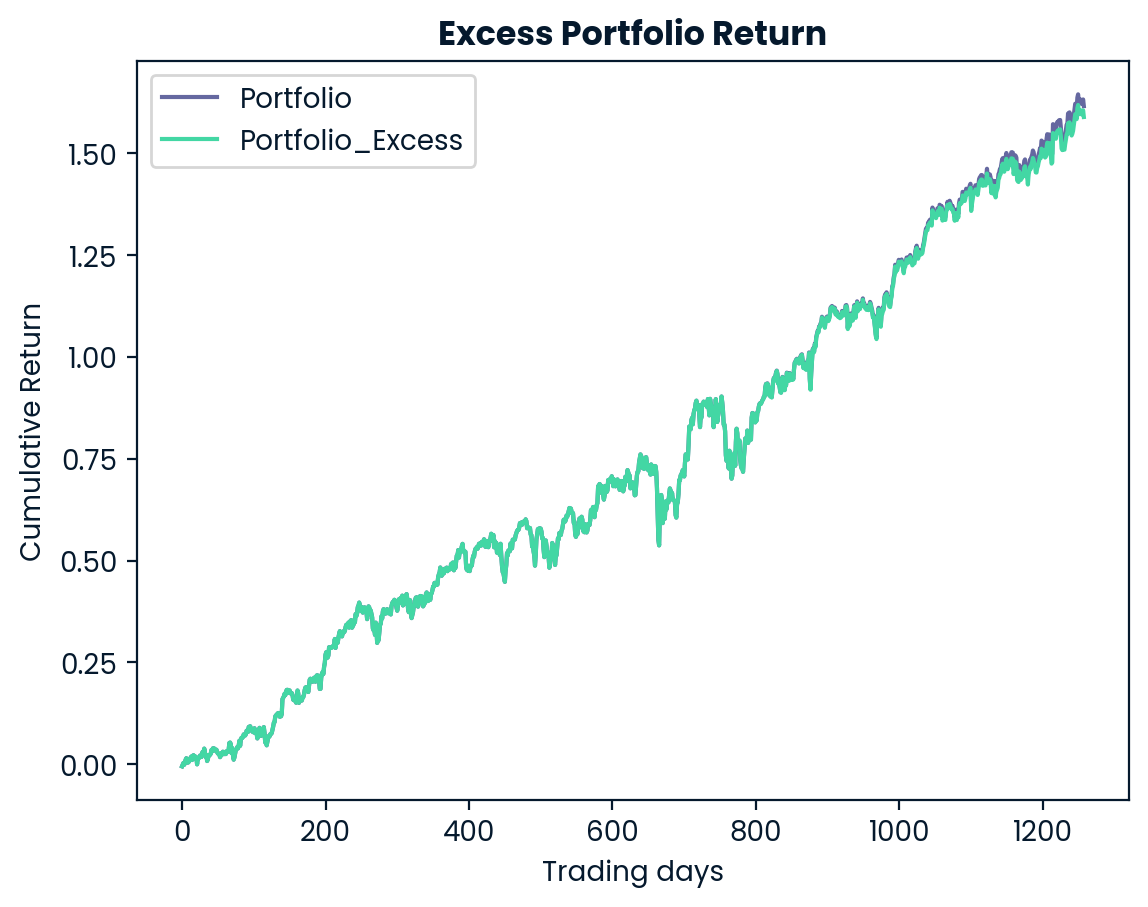

In [ ]:
# Calculate excess portfolio returns
FamaFrenchData['Portfolio_Excess'] = FamaFrenchData['Portfolio'] - FamaFrenchData['RF']
#print(FamaFrenchData.columns)
#print(FamaFrenchData.count)
# Plot returns versus excess returns
CumulativeReturns = ((1+FamaFrenchData[['Portfolio', 'Portfolio_Excess']]).cumprod()-1)
CumulativeReturns.plot()
plt.title("Excess Portfolio Return", fontweight='bold')
plt.xlabel("Trading days")
plt.ylabel("Cumulative Return")
plt.show()

## Calculating beta using covariance

**Beta** is a measure of systematic risk (exposure to broad market) and is an essential component of many financial models. In CAPM. beta is one of two essential factors.

In this exercise, the following formula is used to benchmark the market portfolio:

$$ \beta_{P} = \frac{Cov(R_P, R_B)}{Var(R_B)}$$

- $\beta_P$: Portfolio beta
- $Cov(R_P, R_B)$: The covariance between the portfolio (P) and the benchmark market index (B)
- $Var(R_B)$: The variance of the benchmark market index


- Generate a covariance matrix between 'Portfolio Excess' and 'Market Excess' columns
- Calculate the variance of 'Market Excess' column
- Calculate the portfolio beta

In [ ]:
# Calculate the covariance matrix between Portfolio_Excess and Market_Excess
covariance_matrix = FamaFrenchData[['Portfolio_Excess', 'Market_Excess']].cov()
# Extract the covariance coefficient
covariance_coefficient = covariance_matrix.iloc[0, 1]
print(covariance_coefficient)
# Calculate the benchmark variance
benchmark_variance = FamaFrenchData['Market_Excess'].var()
print(benchmark_variance)
# Calculating the portfolio market beta
portfolio_beta = covariance_matrix.iloc[0, 1] / FamaFrenchData['Market_Excess'].var()
print(portfolio_beta)

5.726126338154964e-05
5.880335088211895e-05
0.9737755165745455


## Calculating beta with CAPM

The CAPM model can be expressed as:
$$E(R_P) - R_F = \beta_P(E(R_M) - R_F)$$

- $E(R_P) - R_F $: The excess expected return of a stock or portfolio P
- $E(R_M) - R_F $: The excess expected return of the broad market portfolio B
- $R_F $: The risk-free rate
- $\beta_P $: Portfolio beta, or exposure, to the broad market portfolio B

- Import `statsmodels.formula.api` as `smf`
- Define a regression model that explains 'Portfolio_Excess' as a function of 'Market_Excess'
- Extract and print the adjusted r-square of the fitted regression model
- Extract the market beta of the portfolio

In [ ]:
# Import statsmodels.formula.api as smf
import statsmodels.formula.api as smf
# Define the regression formula
CAPM_model = smf.ols(formula = "Portfolio_Excess ~ Market_Excess", data=FamaFrenchData)
# Print the adjusted r-squared of the fitted regression
CAPM_fit = CAPM_model.fit()
print(CAPM_fit.rsquared_adj)
# Extract the beta
regression_beta = CAPM_fit.params['Market_Excess']
print(regression_beta)

0.7942627160017839
0.973775516574546


## The Fama French 3-factor model

The Fama-French model famously adds two additional factors to the CAPM model to describe asset returns:
$$R_P = R_F + \beta_M(R_M - R_F) + \beta_{SMB}\cdot SMB + \beta_{HML} \cdot HML + \alpha$$

- $SMB$ : The small minus big factor
- $\beta_{SMB}$ : Exposure to the SMB factor
- $HML$ : The high minus low factor
- $\beta_{HML}$ : Exposure to the HML factor
- $\alpha$ : Performance which is unexplained by any other factors
- $\beta_M$ : Beta to the broad market portfolio B

- Define a regression model that explains `Portfolio_Excess` as a function of `Market_Excess`, `SMB`, and `HML`.
- Extract the adjusted r-squared value from `FamaFrench_fit`.

In [ ]:
# Import statsmodels.formula.api as smf
import statsmodels.formula.api as smf
# Define the regression formula
FamaFrench_model = smf.ols(formula = "Portfolio_Excess ~ Market_Excess + SMB + HML", data=FamaFrenchData)
# Fit regression
FamaFrench_fit = FamaFrench_model.fit()
# Extract the adjusted r-squared
regression_adj_rsq = FamaFrench_fit.rsquared_adj
print(regression_adj_rsq)

0.8193910088585152


## p-values and coefficients

- The `.pvalues` attribute on a fitted `smf.ols` regression model can be used retrieve the p-values for each coefficient.
- Similarly, coefficients can be extracted from the fitted regression object by using the `.params` attribute.

**Note that in this example, a statistically significant negative SMB coefficient would signify a factor exposure to large cap stocks, while a positive coefficient would signify an exposure to small cap stocks.**

- Extract the p-value for 'SMB'
- Extract the regression coefficient for 'SMB'

In [ ]:
# Extract the p-values of the SMB factor
smb_pval = FamaFrench_fit.pvalues['SMB']
# If the p-value is significant, print significant
if smb_pval < 0.05:
    significant_msg = 'significant'
else:
    significant_msg = 'not significant'
# Print the SMB coefficient
smb_coeff = FamaFrench_fit.params['SMB']
print("The SMB coefficient is ", smb_coeff, " and is ", significant_msg)

The SMB coefficient is  -0.26215152743192643  and is  significant


## The efficient market and alpha

The **alpha** ($\alpha$) left over by the regression is unexplained performance due to unknown factors. In the context of a regression model, this is the coefficient of the intercept.

There are two general schools of thought as to why:
- The model simply needs to be expanded. When you have found all of the missing economic factors, you can explain all stock and portfolio returns. This is known as the **_Efficient Market Hypothesis_**.
- There is a degree of unexplainable performance that no model will ever capture reliably. Perhaps it is due to skill, timing, intuition or lucj - but investors should seek to maximize their alpha.

The regression model constructed in the previous exercise will continue to be used here.

- Extract the coefficient of the intercept and assign it to `portfolio_alpha`
- Annualize the `portfolio_alpha` return by assuming 252 trading days in a year

In [ ]:
# Calculate portfolio alpha
portfolio_alpha = FamaFrench_fit.params['Intercept']
print(portfolio_alpha)
# Annualize portfolio alpha
portfolio_alpha_annualized = ((1*portfolio_alpha)**252) - 1
print(portfolio_alpha_annualized)

0.0001832666520318303
-1.0


## The 5-factor model

In 2015, Fama and French extended the previous 3-factor model, adding two additional factors.
- **RMW**: Profitability
- **CMA**: Investment

The RMW factor represents the returns of companies with higher profitability versus those with low operating profitability, and the CMA factor represents the returns of companies with agressive investments versus those who are more conservative.

- Building on the previous exercises, construct the 5-factor model to include the two new additional factors. Call this model `FamaFrench5_model`
- Fit the regression model and store the results in `FamaFrench5_fit`
- Extrat the adjusted r-squared value and assign it to `regression_adj_rsq`

In [ ]:
# Import statsmodels.formula.api
import statsmodels.formula.api as smf
# Define the regression formula
FamaFrench5_model = smf.ols(formula="Portfolio_Excess ~ Market_Excess + SMB + HML + RMW + CMA", data=FamaFrenchData)
# Fit the regression
FamaFrench5_fit = FamaFrench5_model.fit()
#Extract the adjusted r-squared
regression_adj_rsq = FamaFrench5_fit.rsquared_adj
print(regression_adj_rsq)

0.8367245019225793


# Module 4 - Value at Risk

## Historical drawdown

In [ ]:
cum_rets = pd.read_csv('USO.csv', parse_dates=['Date'])
print(cum_rets.columns)
print(cum_rets.head())
print(cum_rets.tail())

Index(['Date', 'USO'], dtype='object')
        Date       USO
0 2007-01-03 -0.042636
1 2007-01-04 -0.040688
2 2007-01-05  0.009285
3 2007-01-08 -0.007109
4 2007-01-09 -0.004001
           Date       USO
2764 2017-12-22  0.001718
2765 2017-12-26  0.024871
2766 2017-12-27 -0.002510
2767 2017-12-28  0.004195
2768 2017-12-29  0.003342


Drawdown can be measured as the percentage loss from the highest cumulative historical point.

In Python, the `.accumulate()` and `.maximum()` functions can be used to calculate the running maximum, and the simple formula below is an expression for drawdown:
$$Drawdown = \frac{r_t}{RM} - 1$$

- $r_t$ : Cumulative return at time t
- $RM$ : Running maximum

The data used in this module is the USO, an ETF that tracks oil prices.

- Calculate the running maximum of the cumulative returns of the USO oil ETF (`cum_rets`) using `np.maximum.accumulate()`
- Where the running maximum (`running_max`) drops below 1, set the running maximum equal to 1
- Calculate `drawdown` using the simple formula above with the `cum_rets` and `running_max`
- Construct a plot to depict the results

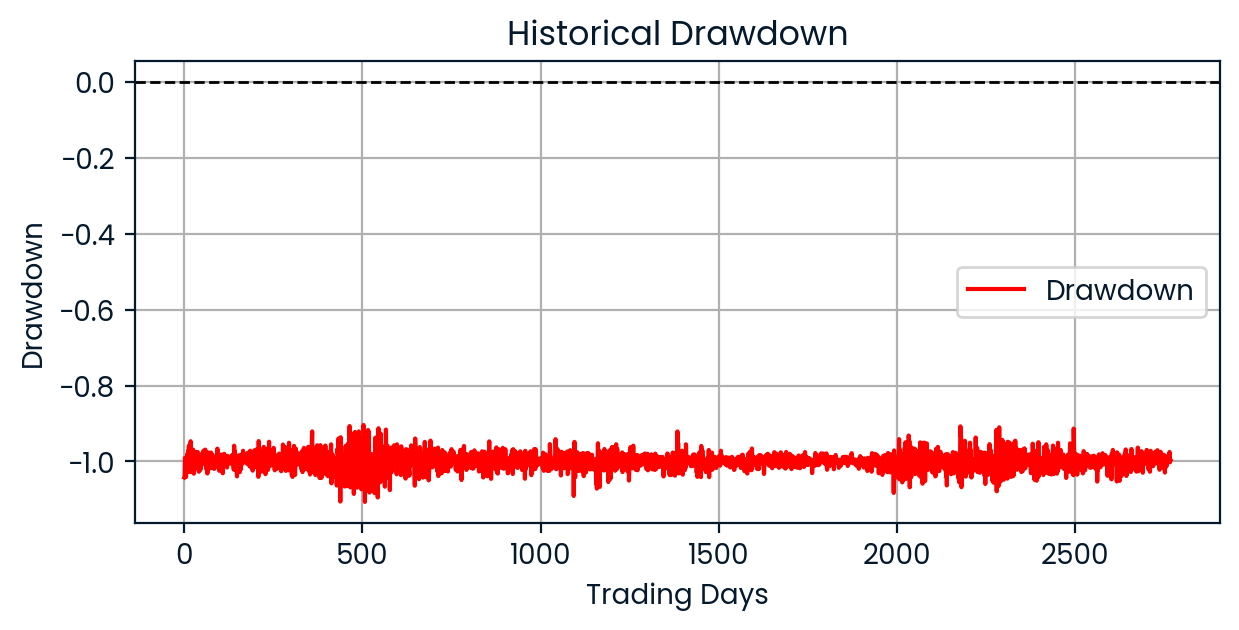

In [ ]:
# Extract only the cumulative returns (assuming it's a column named 'USO')
cumulative_returns = cum_rets['USO']
# Calculate the running maximum
running_max = np.maximum.accumulate(cumulative_returns)
# Ensure the value never drops below 1
running_max[running_max < 1] = 1
# Calculate the percentage drawdown
drawdown = (cumulative_returns / running_max) - 1
# Plot the results
plt.figure(figsize=(7, 3))
drawdown.plot(title="Historical Drawdown", color="red", label="Drawdown")
plt.axhline(0, color="black", linestyle="--", linewidth=1)  # Add a baseline for 0
plt.xlabel("Trading Days")
plt.ylabel("Drawdown")
plt.legend()
plt.grid()
plt.show()

## Historical Value at Risk

While drawdown is a measure of sustained losses over time, it does not infer much about single-day movements.

**Value at Risk (VaR)** is a way to estimate the risk of a single day negative price movement. VaR can be measured for any given probability, or confidence level. However, most commonly quoted is VaR(95) and VaR(99).

Historical VaR is the simplest method to calculate VaR, but relies on historical returns data which may not be a good assumption of the future.
- Historical VaR(95), for example, represents the minimum loss that the portfolio or asset has sustained in the worst 5% of cases.

- Calculate the VaR(95) the worst 5% of USO returns (`StockReturns_perc`) and assign this to `var_95`
- Sort `StockReturns_perc` and assign it to `sorted_rets`
- Plot a histogram of `sorted_rets`

-0.03608233764037496


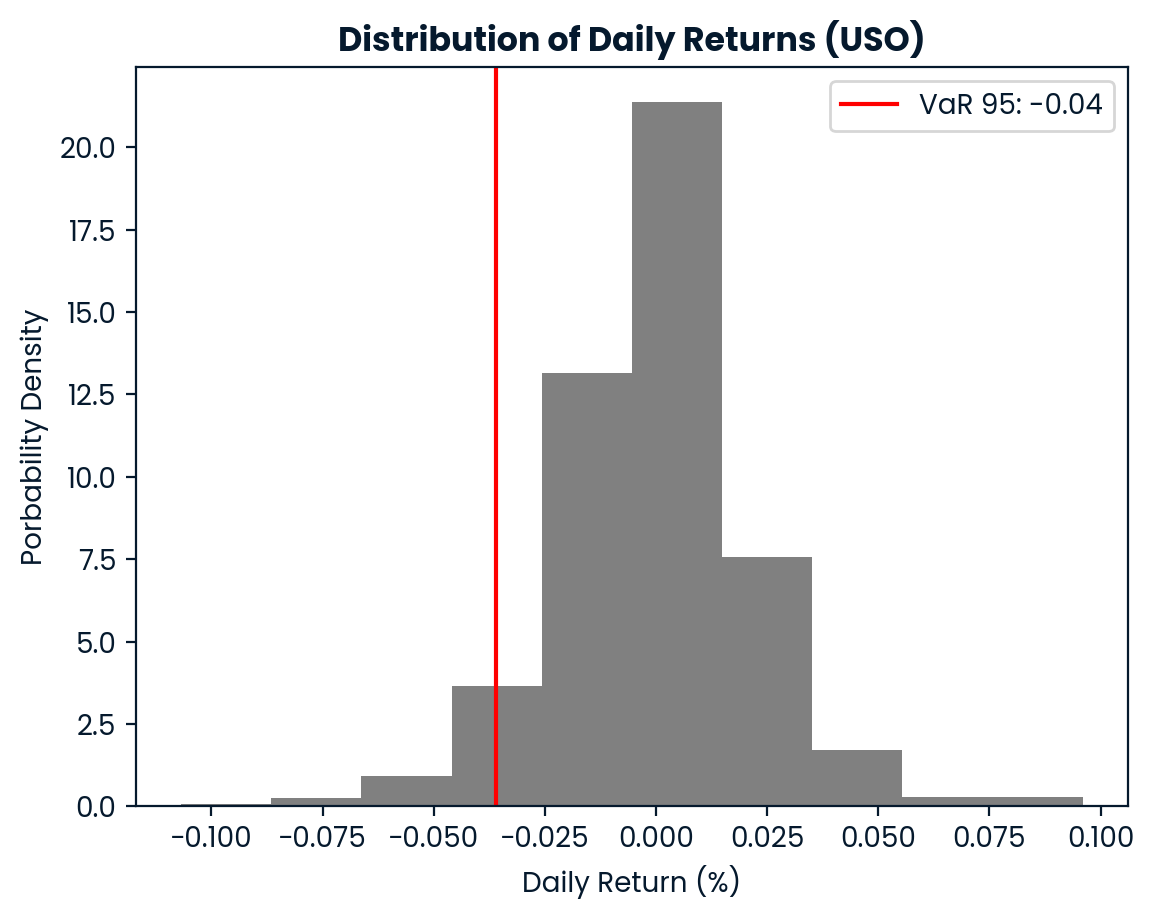

In [ ]:
# Calculate the historical VaR(95)
var_95 = np.percentile(cumulative_returns, 5)
print(var_95)
# Sort the returns for plotting
sorted_rets = np.sort(cumulative_returns)
# Plot the probability of each sorted return quantile
plt.hist(sorted_rets, density=True, stacked=True, color="gray")
plt.xlabel('Daily Return (%)')
plt.ylabel('Porbability Density')
plt.title('Distribution of Daily Returns (USO)', fontweight='bold')
# Denote the VaR 95 quantile
plt.axvline(x=var_95, color='r', linestyle='-', label="VaR 95: {0:.2f}".format(var_95))
plt.legend()
plt.show()

## Historical expected shortfall

**Expected Shortfall**, a.k.a **CVaR**, or conditional value at risk, is the expected loss of the worst case scenarios of returns.

For example, if the portfolio has a VaR(95) of -3%, then the CVaR(95) would be the average value of all losses exceeding -3%.

- Calculate the average of returns where the stock return percentage is less $\leq$ `var_95` and assign it to `cvar_95`
- Plot the histogram of `sorted_rets` using the `plt.hist()` function

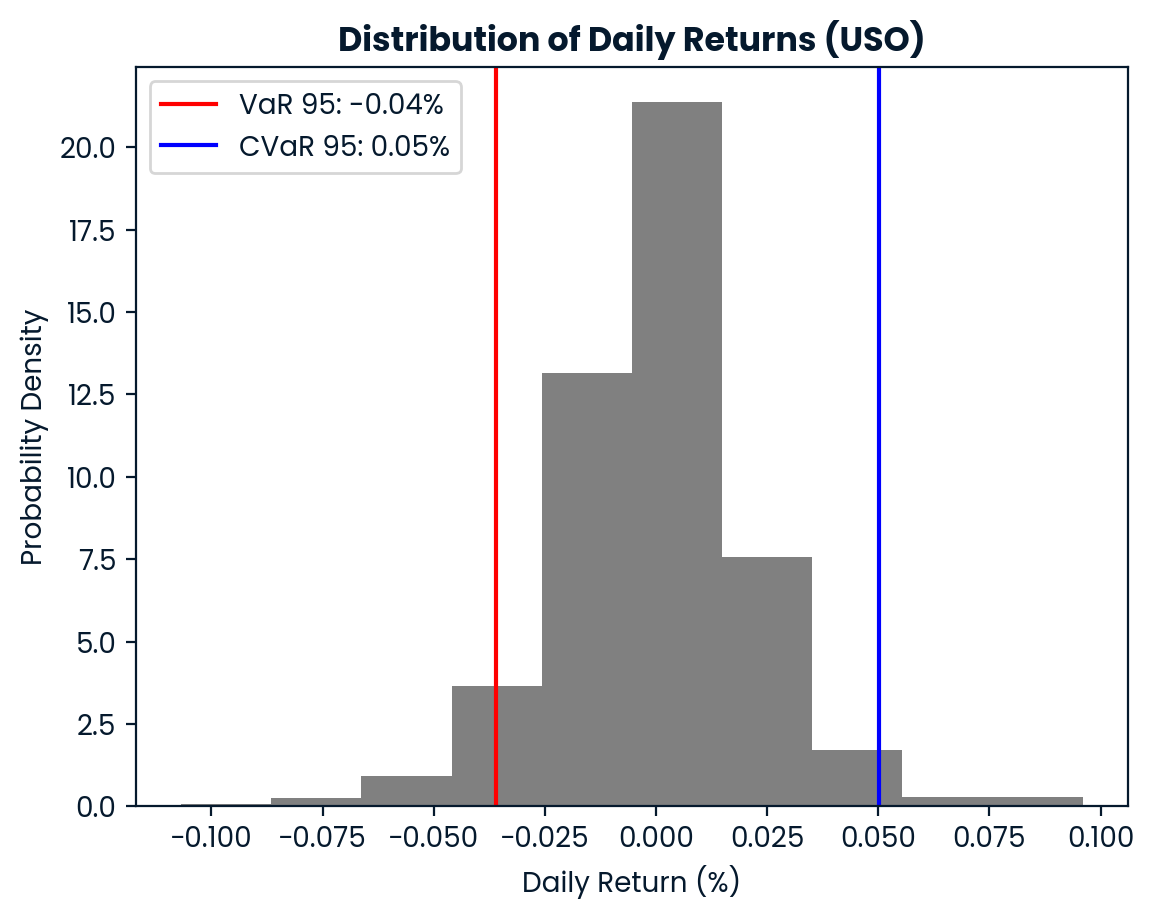

In [ ]:
# Historical CVaR 95
cvar_95 = np.mean(cumulative_returns<=var_95)
#print(cvar_95)
# Sort the returns for plotting
## Using sorted_rets from previous exercise
# Plot the probability of each return quantile
plt.hist(sorted_rets, density=True, stacked=True, color="gray")
plt.xlabel('Daily Return (%)')
plt.ylabel('Probability Density')
plt.title('Distribution of Daily Returns (USO)', fontweight='bold')
# Denote the VaR 95 and CVaR 95 quantiles
plt.axvline(x=var_95, color="r", linestyle='-', label="VaR 95: {0:.2f}%".format(var_95))
plt.axvline(x=cvar_95, color="b", linestyle='-', label="CVaR 95: {0:.2f}%".format(cvar_95))
plt.legend()
plt.show()

## Changing VaR and CVaR quantiles

VaR quantiles often used are 90%, 95%, and 99%, corresponding to the worst 10%, 5%, and 1% of cases respectively. The same quantiles are also used for CVaR. Note that CVaR will always be a more extreme estimate when compared with VaR for the same quantile.

- Calcualte the VaR(90) for `cum_rets` and save the result to `var_90`
- Calculate the CVaR(90) for `cum_rets` and save the result in `cvar_90`

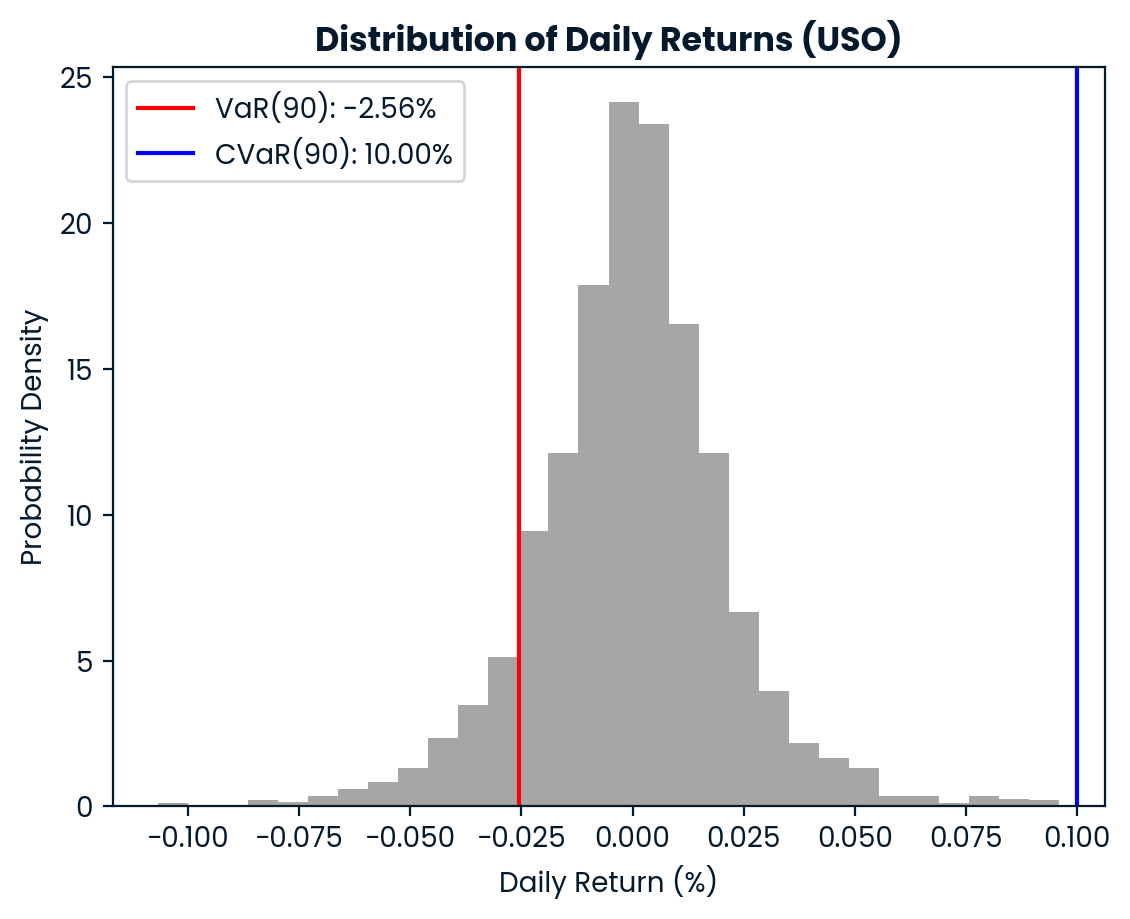

In [ ]:
# Historical VaR(90) quantiles
var_90 = np.percentile(cumulative_returns, 10)
#print(var_90)
# Historical CVaR(90) quantiles
cvar_90 = np.mean(cumulative_returns <= var_90)
#print(cvar_90)
# Plot to compare
plt.hist(cumulative_returns, bins=30, density=True, alpha=0.7, color="gray")
plt.axvline(x=var_90, color="r", linestyle='-', label="VaR(90): {0:.2f}%".format(var_90 * 100))
plt.axvline(x=cvar_90, color="b", linestyle='-', label="CVaR(90): {0:.2f}%".format(cvar_90 * 100))
plt.xlabel('Daily Return (%)')
plt.ylabel('Probability Density')
plt.title('Distribution of Daily Returns (USO)', fontweight='bold')
plt.legend()
plt.show()

## Parametric VaR

VaR can also be computed parametrically using a method known as variance/covariance VaR. This method allows simulation of a range of possibilities based on historical return distribution properties rather than actual return values.

The parametric VaR(90) can be calculated using:
```
# Import norm from scipy.stats
from scipy.stats import norm
# Calculate Parametric VaR
norm.ppf(confidence_level=0.10, mu, vol)
```
where **mu** and **vol** are the mean and volatility, respectively.

- Import `norm` from `scipy.stats`
- Calculate the mean and volatility of `cum_rets` and assign to `mu` and `vol`, respectively
- Set the `confidence_level` for VaR(95)
- Calculate the VaR(95) using the `norm.ppf()` function, passing the confidence level as the parameter, with **mu** and **vol** as the second and third parameters.

In [ ]:
# Import norm form scipy.stats
from scipy.stats import norm
# Estimate the average daily return
mu = np.mean(cumulative_returns)
# Estimate the daily volatility
vol = np.std(cumulative_returns)
# Set the VaR confidence level
confidence_level = 0.05
# Calculate Parametric Var
var_95 = norm.ppf(confidence_level, loc=mu, scale=vol)
print('Mean: ', str(round(mu,5)), '\nVolatility: ', str(round(vol,5)), '\nVaR(95): ', str(round(var_95, 5)))

Mean:  -0.00029 
Volatility:  0.02189 
VaR(95):  -0.03629


## Scaling risk estimates

The VaR(95) value obtained in previous exercises is simply the _**value at risk for a single day**_. To estimate VaR for a longer time horizon, scale the value by the square root of time, similar to scaling volatility:

$$ \text{VaR(95)}_{\text{t days}} = \text{VaR(95)}_{\text{1 day}} * \sqrt{t} $$

In this exercise, we estimate the VaR for the USO oil ETF for 1 to 100 days from now.
We will also need to define a function `plot_var_scale()` that plots the VaR for 1 to 100 days from now.

- Loop from 0 to 100 (not including 100), using the `range()` function
- Set the second column of `forecasted_values` at each index equal to the forecasted VaR, multiplying `var_95` by the square root of `i+1` using the `np.sqrt` function

In [ ]:
# Defining the plotting function
def plot_var_scale(forecasted_values):
    """
    Plots the scaled VaR over a 1-to-100-day horizon.

    Parameters:
    forecasted_values: np.ndarray
        A 2D array where the first column represents the time horizon
        and the second column represents the scaled VaR values.
    """
    plt.figure(figsize=(8, 4))
    plt.plot(forecasted_values[:, 0], forecasted_values[:, 1], color='b', label='Forecasted VaR (95%)')
    plt.xlabel('Time Horizon (Days)')
    plt.ylabel('VaR (95%)')
    plt.title('VaR Scaling with Time Horizon', fontweight='bold')
    plt.legend()
    plt.show()

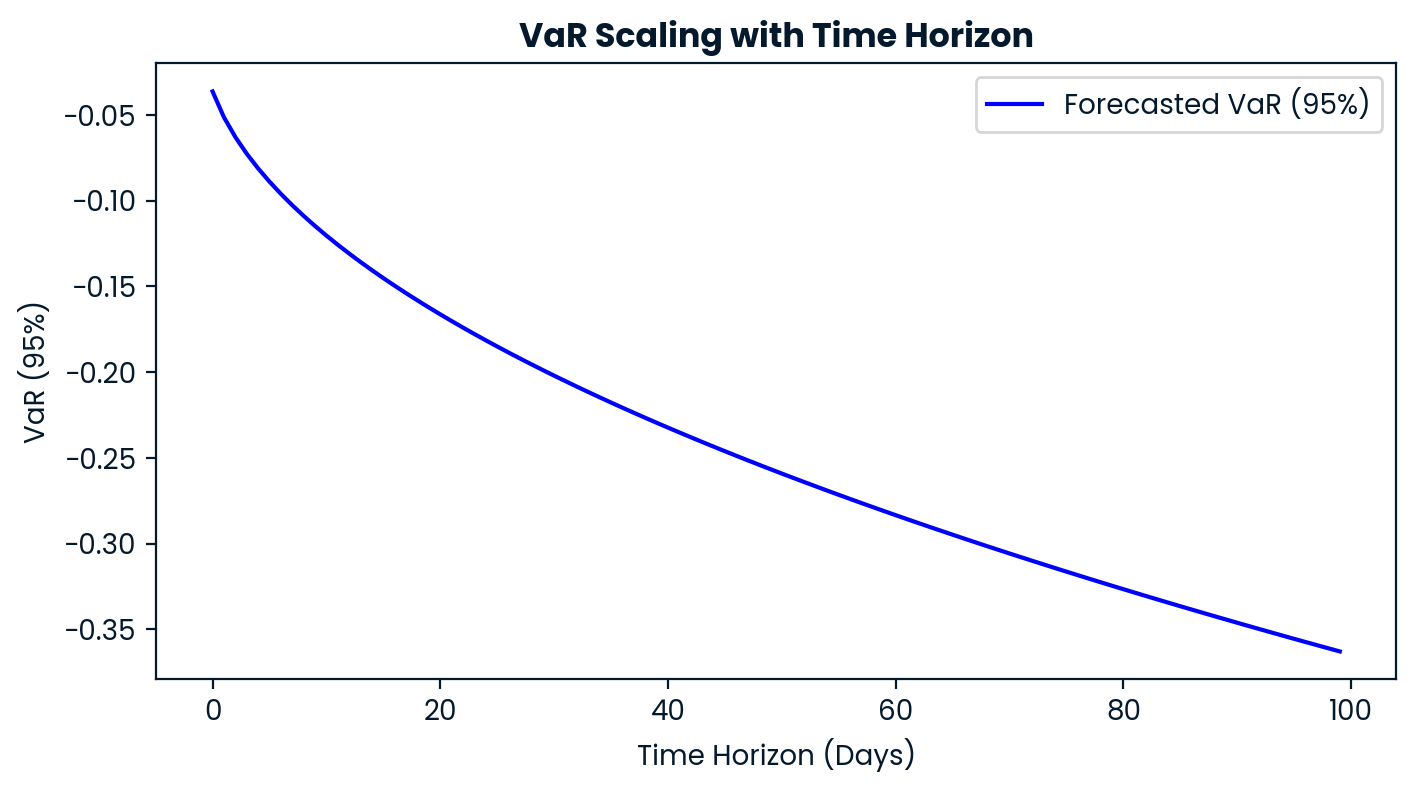

In [ ]:
# Aggregated forecasted VaR
forecasted_values = np.empty([100, 2])
# Loop through each forecast period
for i in range(100):
    # Save the time horizon i
    forecasted_values[i, 0] = i
    # Save the forecasted VaR 95
    forecasted_values[i, 1] = var_95 * np.sqrt(i + 1)
# Plot the results
plot_var_scale(forecasted_values)

## A random walk simulation

**Stochastic** or random walk movements are used in physics to represent particle and fluid movements, in mathematics to describe fractal behaviour, and in finance to describe stock market movements.

The `np.random.normal()` function can be used to model random walk movements of the USO oil ETF with a constant daily average return (**mu**) and average daily volatility (**vol**) over the course of **T** trading days.

- Set the number of simulated trading days (T) equal to 252, and the initial stock price (S0) equal to 10
- Calculate T random normal values using np.random.normal(), passing in mu and vol, and T as parameters, then adding 1 to the values and assign it to `rand_rets`
- Calculate the random walk by multiplying `rand_rets.cumprod()` by the initial stock price and assign it to `forecasted_values`

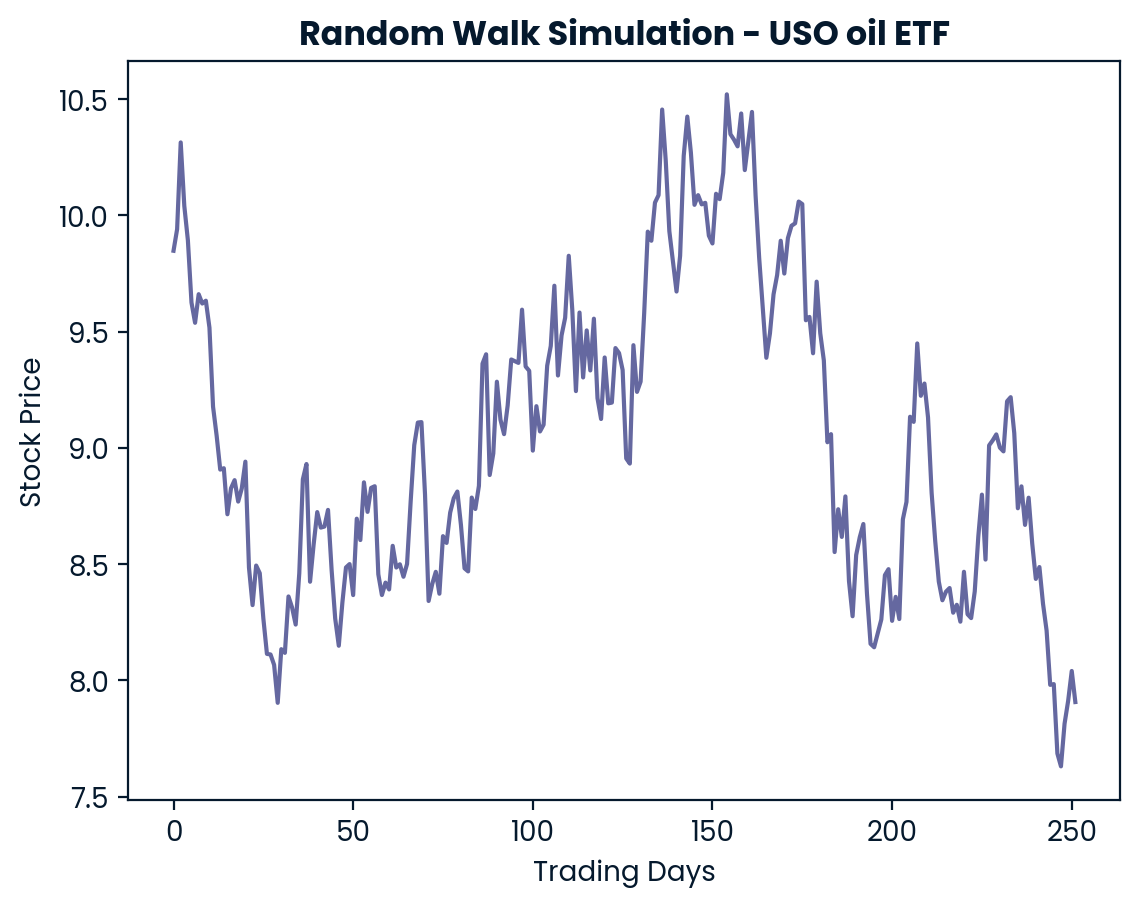

In [ ]:
# Set the simulation parameters
## mu and vol values employed from previous exercises
T = 252
S0 = 10
# Add 1 to the random returns
rand_rets = np.random.normal(mu, vol, T) + 1
# Forecasted random walk
forecasted_values = S0 * rand_rets.cumprod()
# Plot the random walk
plt.plot(range(0, T), forecasted_values)
plt.xlabel('Trading Days')
plt.ylabel('Stock Price')
plt.title('Random Walk Simulation - USO oil ETF', fontweight='bold')
plt.show()

## Monte Carlo simulations

These simulations are used to model a wide range of possibilities.

Monte-Carlo can be constructed in many different ways, but all involve generating a large number of random variants of a given model, allowing a wide distribution of possible paths to be analyzed. This enables a comprehensive forecast of possibilities to sample from without a large amount of historical data.

For this exercise, generate 100 Monte-Carlo simulations of the USO oil ETF.
The parameters mu, vol, T and S0 is used from the previous exercise.

- Loop from 0 to 100 (not including 100) using the `range()` function
- Call the plotting fucntion for each iteration using the `plt.plot()` function, passing the range of values T (range(T)) as the first argument and the `forecasted_values` as the second argument.

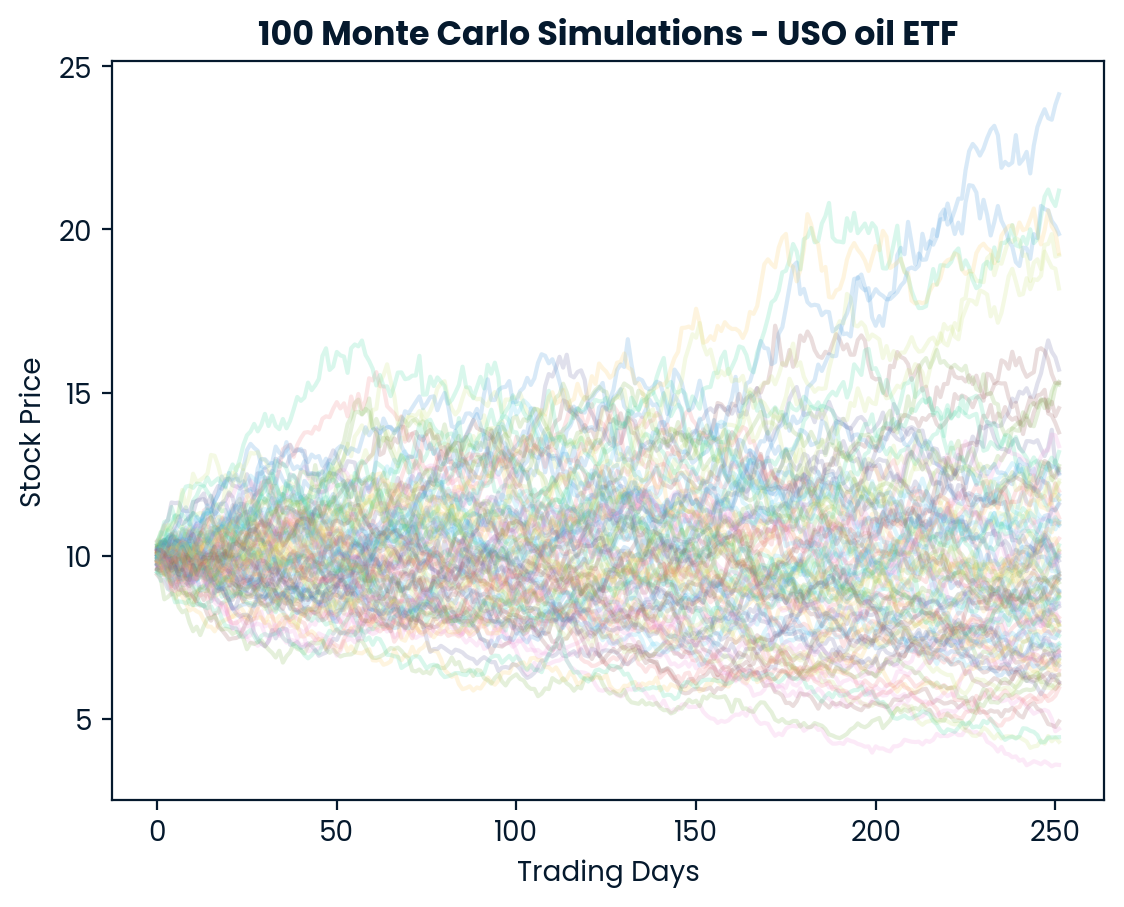

In [ ]:
# Loop through 100 simulations
for i in range(100):
    # Generate the random returns
    rand_rets = np.random.normal(mu, vol, T) + 1
    # Create the Monte Carlo path
    forecasted_values = S0 * rand_rets.cumprod()
    # Plot the Monte Carlo path
    plt.plot(range(0, T), forecasted_values, alpha = 0.2)
# Show the simulations
plt.xlabel('Trading Days')
plt.ylabel('Stock Price')
plt.title('100 Monte Carlo Simulations - USO oil ETF', fontweight='bold')
plt.show()

## Monte Carlo VaR

Both the return values and the Monto-Carlo paths can be used for analysis of everything ranging from option pricing models and hedging to portfolio optimization and trading strategies.

For this exercise, aggregate the returns data at each iteration, and use the resulting values to forecast parametric VaR(99).

- Use the `.append()` method to append the `rand_rets` to `sim_returns` list in each iteration
- Calculate the parametric VaR(99) using the `np.percentile()` function on `sim_returns`

In [ ]:
# Aggregate the returns
sim_returns = []
# Loop through 100 simulations
for i in range(100):
    # Generate the Random Walk
    rand_rets = np.random.normal(mu, vol, T)
    # Save the results
    sim_returns.append(rand_rets)
# Calculate the VaR(99)
var_99 = np.percentile(sim_returns, 1)
print("Parametric VaR(99): ", round(100*var_99, 2), "%")

Parametric VaR(99):  -5.13 %
